<a href="https://colab.research.google.com/github/akmalrusdy/python/blob/main/KATARAK_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile
import os
import tensorflow as tf
import numpy as np
import cv2
from imutils import paths
from PIL import Image
from sklearn.preprocessing import LabelBinarizer
from tensorflow.keras.optimizers import Adam, Adamax, SGD, RMSprop
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D, AveragePooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.layers.core import Dropout
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint
import shutil

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/TA/Dataset/Dataset-Final/80-20'

/content/drive/MyDrive/Colab Notebooks/TA/Dataset/Dataset-Final/80-20


In [ ]:
train_imagePaths = paths.list_images("train")
train_data = []
train_labels = []

test_imagePaths = paths.list_images("test")
test_data = []
test_labels = []


In [ ]:
for imagePath in train_imagePaths:
  img = cv2.imread(imagePath)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(cv2.resize(img, (64, 64))) / 255.0
  label = imagePath.split(os.path.sep)[-2]
  train_data.append(img)
  train_labels.append(label)

for imagePath in test_imagePaths:
  img = cv2.imread(imagePath)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
  img = np.array(cv2.resize(img, (64, 64))) / 255.0
  label = imagePath.split(os.path.sep)[-2]
  test_data.append(img)
  test_labels.append(label)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [ ]:
# FOR RGB
trainX = np.array(train_data) 
trainY = np.array(train_labels) 
testX = np.array(test_data)
testY = np.array(test_labels)
print(trainX.shape)
print(testX.shape)

(360, 64, 64, 3)
(90, 64, 64, 3)


### TRAINING MODEL

In [ ]:
model = Sequential()

#Feature Learning
model.add(Conv2D(8, (3, 3), input_shape=(64,64,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#Classification
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(3))
model.add(Activation('softmax'))

opt = Adam(learning_rate=0.001)
model.compile(loss="categorical_crossentropy", 
              optimizer=opt,
	            metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 62, 62, 8)         224       
                                                                 
 activation_18 (Activation)  (None, 62, 62, 8)         0         
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 29, 29, 16)        1168      
                                                                 
 activation_19 (Activation)  (None, 29, 29, 16)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 16)       0         
 g2D)                                                 

In [ ]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=50, batch_size=32)

Epoch 1/50
12/12 [==============================] - 1s 22ms/step - loss: 1.0910 - accuracy: 0.3500 - val_loss: 1.0678 - val_accuracy: 0.4111
Epoch 2/50
12/12 [==============================] - 0s 8ms/step - loss: 1.0068 - accuracy: 0.4778 - val_loss: 0.9989 - val_accuracy: 0.4222
Epoch 3/50
12/12 [==============================] - 0s 9ms/step - loss: 0.8475 - accuracy: 0.6167 - val_loss: 0.7737 - val_accuracy: 0.6889
Epoch 4/50
12/12 [==============================] - 0s 8ms/step - loss: 0.7055 - accuracy: 0.6722 - val_loss: 0.6166 - val_accuracy: 0.8444
Epoch 5/50
12/12 [==============================] - 0s 8ms/step - loss: 0.5530 - accuracy: 0.7778 - val_loss: 0.5404 - val_accuracy: 0.7667
Epoch 6/50
12/12 [==============================] - 0s 8ms/step - loss: 0.4770 - accuracy: 0.8028 - val_loss: 0.5340 - val_accuracy: 0.6889
Epoch 7/50
12/12 [==============================] - 0s 8ms/step - loss: 0.4018 - accuracy: 0.8417 - val_loss: 0.3951 - val_accuracy: 0.8333
Epoch 8/50
12/12 [=

In [ ]:
from sklearn.metrics import classification_report
print("[INFO] evaluating network...")
predictions = model.predict(trainX, batch_size=32)
print(classification_report(trainY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_, digits=4))

from sklearn.metrics import classification_report
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
predictions.argmax(axis=1), target_names=lb.classes_, digits=4))


[INFO] evaluating network...
              precision    recall  f1-score   support

    immature     1.0000    1.0000    1.0000       120
      mature     1.0000    1.0000    1.0000       120
      normal     1.0000    1.0000    1.0000       120

    accuracy                         1.0000       360
   macro avg     1.0000    1.0000    1.0000       360
weighted avg     1.0000    1.0000    1.0000       360

[INFO] evaluating network...
              precision    recall  f1-score   support

    immature     0.9091    1.0000    0.9524        30
      mature     0.9655    0.9333    0.9492        30
      normal     1.0000    0.9333    0.9655        30

    accuracy                         0.9556        90
   macro avg     0.9582    0.9556    0.9557        90
weighted avg     0.9582    0.9556    0.9557        90



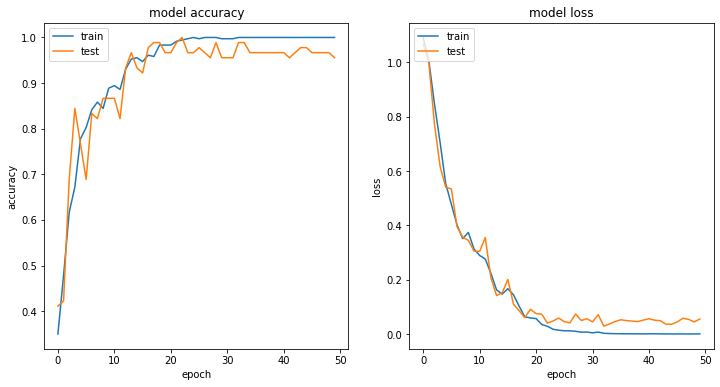

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# summarize history for accuracy
ax[0].plot(H.history['accuracy'])
ax[0].plot(H.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

# summarize history for loss
ax[1].plot(H.history['loss'])
ax[1].plot(H.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()


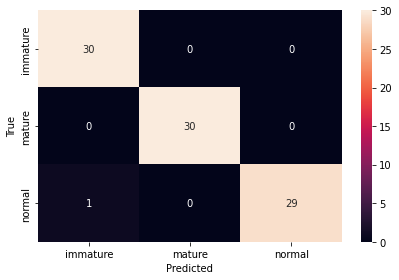

In [ ]:
import sklearn.metrics as metrics
import seaborn as sn
import matplotlib.pyplot as plt
confusion_matrix = metrics.confusion_matrix(testY.argmax(axis=1),predictions.argmax(axis=1))
x_axis_labels = ['immature','mature','normal']
y_axis_labels = ['immature','mature','normal']
sn.heatmap(confusion_matrix, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.show()

In [ ]:
TF_LITE_MODEL_FILE_NAME = "tf_lite_model_64.tflite"

In [ ]:
tf_lite_converter = tf.lite.TFLiteConverter.from_keras_model(model)
# tf_lite_converter.optimizations = [tf.lite.Optimize.OPTIMIZE_FOR_SIZE]
tf_lite_converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tf_lite_converter.target_spec.supported_types = [tf.float16]
tflite_model = tf_lite_converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp8gx58ib3/assets


In [ ]:
tflite_model_name = TF_LITE_MODEL_FILE_NAME
open(tflite_model_name, "wb").write(tflite_model)

1208128

In [ ]:
interpreter = tf.lite.Interpreter(model_path = TF_LITE_MODEL_FILE_NAME)
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

Input Shape: [ 1 64 64  3]
Input Type: <class 'numpy.float32'>
Output Shape: [1 3]
Output Type: <class 'numpy.float32'>


In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

def upload():
  uploaded = files.upload()

  for fn in uploaded.keys():
    path = fn 
    img = image.load_img(path, target_size =(64,64))
    imgplot = plt.imshow(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    interpreter = tf.lite.Interpreter(model_path = 'tf_lite_model_64.tflite')
    interpreter.allocate_tensors()
    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    interpreter.set_tensor(input_details[0]['index'], images)
    interpreter.invoke()
    tflite_model_predictions = interpreter.get_tensor(output_details[0]['index'])
    prediction_classes = np.argmax(tflite_model_predictions, axis=1)
    print(prediction_classes)



In [ ]:
!pip install memory_profiler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=113ab64462de701f708a0283cfcf375eddfd772cdb5eaec53c22487f83415393
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
%load_ext memory_profiler

Saving Pas foto_Adelia.jpg to Pas foto_Adelia.jpg
[2]
peak memory: 2701.68 MiB, increment: 0.01 MiB


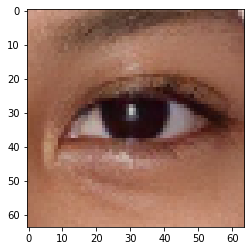

In [ ]:
%memit upload()

Saving 4_jpg.rf.44a79ba470333421eff2352fc6cc5422.jpg to 4_jpg.rf.44a79ba470333421eff2352fc6cc5422.jpg
[[1. 0. 0.]]
['immature']


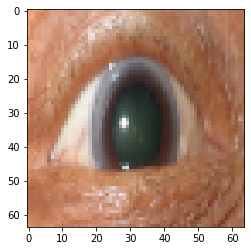

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn 
  img = image.load_img(path, target_size =(64,64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(classes)
  print(lb.classes_[classes.argmax(axis=1)])